In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from functools import partial

## Constants

In [2]:
NX = int(2./0.025)
NT = int(1/0.0025)
X_START = -1
X_END = 1
T_START = 0
T_END = 1
ALPHA = 1./jnp.pi**2

## Space-Time Domain details

In [3]:
x = jnp.linspace(X_START, X_END, NX+1)
dx = x[1] - x[0]

t = jnp.linspace(T_START, T_END, NT+1)
dt = t[1] - t[0]

In [4]:
beta = ALPHA * dt / dx**2 

## Utils for plotting

In [11]:
# U = jnp.zeros((NT + 1, NX + 1))
u = -jnp.sin(jnp.pi * x)

def exact_soln(t, x):
    return -jnp.exp(-t) * jnp.sin(jnp.pi * x)

def error(u_exact, u_num):
    return jnp.absolute(u_exact - u_num)

## Main Loop function

In [12]:
@partial(jax.jit, static_argnames =['NX', 'NT'])
def num_loop(u, beta, NX, NT):
    for _ in jnp.arange(1, NT + 1):
        u = u.at[1:NX].set(jax.lax.slice(u,(1,), (NX,)) + beta * (jax.lax.slice(u,(0,), (NX - 1,)) - 2. * jax.lax.slice(u,(1,), (NX,)) + jax.lax.slice(u,(2,), (NX + 1,))))
        u = u.at[0].set(0)
        u = u.at[-1].set(0)
    return u

In [13]:
u = num_loop(u, beta, NX, NT)

In [14]:
u_exact_at_1 = exact_soln(1., x)
norm_error = error(u_exact_at_1, u)
max_norm_error = jnp.max(norm_error)

## Plotting the results

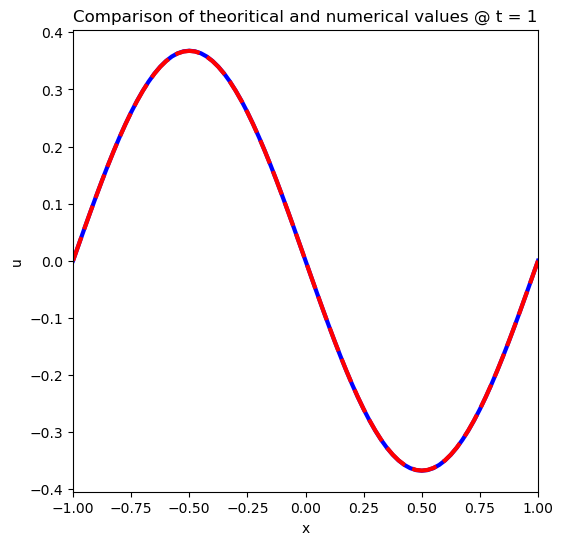

In [15]:
plt.figure(figsize=(6,6))
plt.plot(x, u_exact_at_1, c="b", linewidth=3)
plt.plot(x, u, c="red", dashes=[6,2], linewidth=3)
plt.xlabel("x")
plt.ylabel("u")
plt.xlim((-1,1))
plt.title("Comparison of theoritical and numerical values @ t = 1")
plt.show()

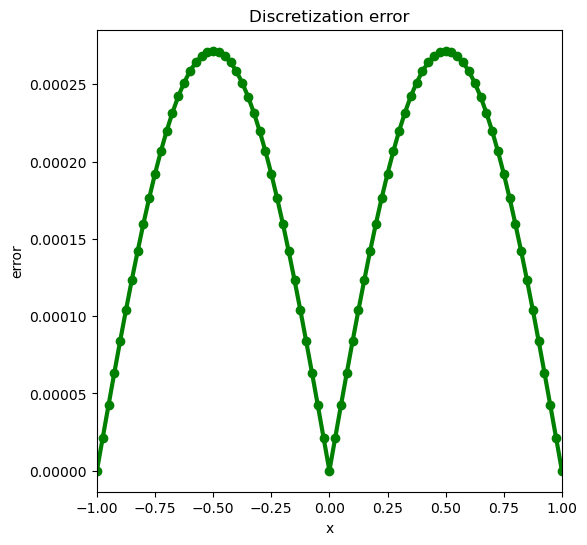

In [16]:
plt.figure(figsize=(6,6))
plt.plot(x, norm_error, c="g", linewidth=3, marker="o")
plt.xlabel("x")
plt.ylabel("error")
plt.xlim((-1,1))
plt.title("Discretization error")
plt.show()